    Math_Score  Science_Score  Mahalanobis_Distance  Outlier
0           78             72              1.834788    False
1           85             80              0.887986    False
2           90             88              0.911697    False
3           95             92              0.746916    False
4           88             84              0.257164    False
5           76             70              1.975515    False
6           94             90              0.207207    False
7           98             96              1.418524    False
8          200            180              3.569800     True
9           77             74              0.680612    False
10          82             79              0.395491    False
11          86             85              1.153049    False
12          93             91              1.094167    False
13          75             73              0.620345    False
14          89             86              0.396672    False


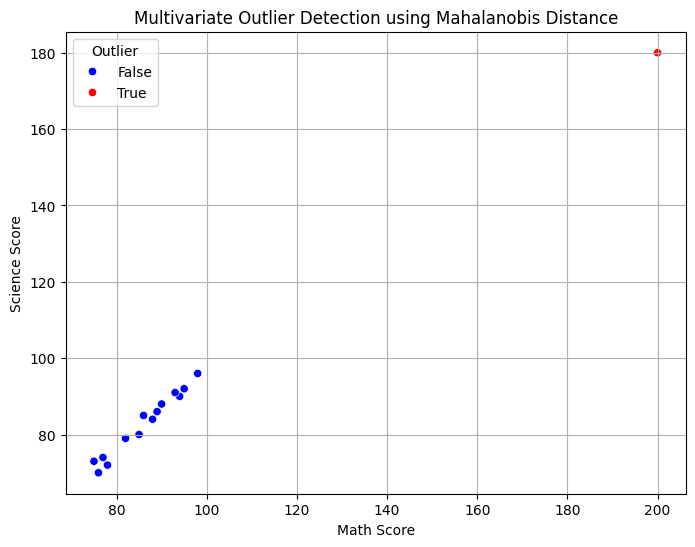

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt

# Sample multivariate dataset
data = {
    'Math_Score': [78, 85, 90, 95, 88, 76, 94, 98, 200, 77, 82, 86, 93, 75, 89],
    'Science_Score': [72, 80, 88, 92, 84, 70, 90, 96, 180, 74, 79, 85, 91, 73, 86]
}
df = pd.DataFrame(data)

# Calculate Mahalanobis distance
def mahalanobis_distance(X):
    cov_matrix = np.cov(X.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_distr = X.mean(axis=0)

    distances = []
    for i in range(len(X)):
        diff = X[i] - mean_distr
        md = np.sqrt(diff.T @ inv_cov_matrix @ diff)
        distances.append(md)
    return np.array(distances)

# Prepare data
X = df[['Math_Score', 'Science_Score']].values

# Compute Mahalanobis distances
df['Mahalanobis_Distance'] = mahalanobis_distance(X)

# Determine threshold (e.g., 0.99 quantile of chi-squared distribution with df=2)
threshold = chi2.ppf(0.99, df=2)
df['Outlier'] = df['Mahalanobis_Distance'] > np.sqrt(threshold)

# Show results
print(df[['Math_Score', 'Science_Score', 'Mahalanobis_Distance', 'Outlier']])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Math_Score', y='Science_Score', hue='Outlier', palette={True: 'red', False: 'blue'})
plt.title('Multivariate Outlier Detection using Mahalanobis Distance')
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.legend(title='Outlier')
plt.grid(True)
plt.show()
